## **Getting the data:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import itertools
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [2]:
#from google.colab import files
#uploaded = files.upload()
folder='https://raw.githubusercontent.com/hh26/EPL-Predictions/master/CSV/'

In [4]:
x_train = pd.read_csv(folder+'XTRAIN2.csv')
y_train = pd.read_csv(folder+'YTRAIN2.csv')
x_test = pd.read_csv(folder+'XTEST2.csv')
y_test = pd.read_csv(folder+'YTEST2.csv')
y_train=y_train.values.ravel()
y_test=y_test.values.ravel()

In [5]:
y_train

array(['H', 'H', 'H', ..., 'D', 'D', 'H'], dtype=object)

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot

In [7]:
x_train.columns

Index(['HForm', 'AForm', 'HSt', 'ASt', 'HSTKPP', 'ASTKPP', 'HGKPP', 'AGKPP',
       'HCKPP', 'ACKPP', 'HAttack', 'AAttack', 'HMidField', 'AMidField',
       'HDefence', 'ADefence', 'HOverall', 'AOverall', 'HTGD', 'ATGD',
       'HStWeighted', 'AStWeighted', 'FormDifferential', 'StDifferential',
       'STKPP', 'GKPP', 'CKPP', 'RelAttack', 'RelMidField', 'RelDefence',
       'RelOverall', 'GDDifferential', 'StWeightedDifferential'],
      dtype='object')

## **Class A features alone:**

In [8]:
classAfeatures=['HForm', 'AForm', 'HSt', 'ASt', 'HSTKPP', 'ASTKPP', 'HGKPP', 'AGKPP',
       'HCKPP', 'ACKPP', 'HAttack', 'AAttack', 'HMidField', 'AMidField',
       'HDefence', 'ADefence', 'HOverall', 'AOverall', 'HTGD', 'ATGD',
       'HStWeighted', 'AStWeighted']

In [9]:
x_train_a=x_train[classAfeatures]
x_test_a=x_test[classAfeatures]

In [10]:
GNB=GaussianNB()
crossvalscores=[]
cvscore=cross_val_score(GNB,x_train_a,y_train,cv=10)
crossvalscores.append(np.mean(cvscore))
print("Cross Validation Score for Class A features: "+ str(np.mean(crossvalscores)))

GNB.fit(x_train_a,y_train)
print("Validation Accuracy: "+ str(GNB.score(x_train_a,y_train)))
print("Testing Accuracy: "+ str(GNB.score(x_test_a,y_test)))

Cross Validation Score for Class A features: 0.5044175731675731
Validation Accuracy: 0.5092566220450014
Testing Accuracy: 0.5484375


<AxesSubplot:>

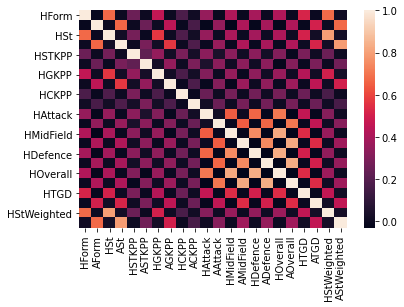

In [11]:
sns.heatmap(x_train_a.corr(method='kendall'))

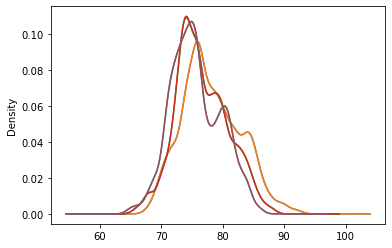

In [12]:
nonGaussianDistcols = ['HAttack', 'AAttack', 'HMidField', 'AMidField','HDefence', 'ADefence']
for col in nonGaussianDistcols:
  x_train_a[col].plot.kde()

In [13]:
x_train_a.drop(nonGaussianDistcols, axis = 1 , inplace = True)
x_test_a.drop(nonGaussianDistcols, axis = 1 , inplace = True)

D:\Softwares\Anaconda\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
cvscore=cross_val_score(GNB,x_train_a,y_train,cv=10)
crossvalscores.append(np.mean(cvscore))
print("Cross Validation Score for Class A features: "+ str(np.mean(crossvalscores)))

GNB.fit(x_train_a,y_train)
print("Validation Accuracy: "+ str(GNB.score(x_train_a,y_train)))
print("Testing Accuracy: "+ str(GNB.score(x_test_a,y_test)))

Cross Validation Score for Class A features: 0.5037053224553224
Validation Accuracy: 0.5092566220450014
Testing Accuracy: 0.55


In [15]:
y_pred=GNB.predict(x_test_a)
labels=['H','A','D']

ConfusionMatrix= confusion_matrix(y_test,y_pred,labels)
print(ConfusionMatrix)

[[213  63  32]
 [ 46 114  14]
 [ 80  53  25]]


D:\Softwares\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=['H', 'A', 'D'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [16]:
print(classification_report(y_test,y_pred,labels))

              precision    recall  f1-score   support

           H       0.63      0.69      0.66       308
           A       0.50      0.66      0.56       174
           D       0.35      0.16      0.22       158

    accuracy                           0.55       640
   macro avg       0.49      0.50      0.48       640
weighted avg       0.52      0.55      0.52       640



In [17]:
prob_pred = GNB.predict_proba(x_test_a)

def RPS(p, e, r):
    m = dict(zip(np.unique(y_pred), [0, 1, 2]))
    n = len(p)
    rps = []
    for x in range(n):
        sum1=0

        for i in range(0, r):
            sum2=0
            obs = [0]*r
            obs[m[e[x]]] = 1

            for j in range(0, i):
                sum2 += p[x][j]-obs[j]

            sum1 += sum2**2
        rps.append(sum1/(r-1))

    #print(rps)

    #print('RPS:' + str(sum(rps)/n))
    print(np.mean(rps))
RPS(prob_pred, y_test, 3)

0.2173070583332633


In [18]:
Actual=[]
Home=Away=Draw=0
for i in y_test:
  if(i=='H'):
    Home+=1;
  elif(i=='A'):
    Away+=1;
  else:
    Draw+=1;
Actual.append(Home)
Actual.append(Away)
Actual.append(Draw)

In [19]:
Predicted=[]
PHome=PAway=PDraw=0
for i in y_pred:
  if(i=='H'):
    PHome+=1;
  elif(i=='A'):
    PAway+=1;
  else:
    PDraw+=1;
Predicted.append(PHome)
Predicted.append(PAway)
Predicted.append(PDraw)

#### Plots


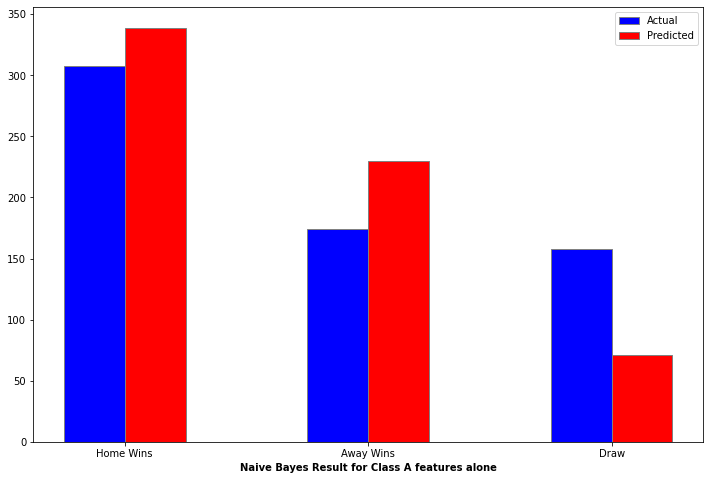

In [20]:
import numpy as np 
import matplotlib.pyplot as plt 
   
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 
      
# Set position of bar on X axis 
br1 = np.arange(3) 
br2 = [x + barWidth for x in br1] 
   
# Make the plot 
plt.bar(br1, Actual, color ='b', width = barWidth, 
        edgecolor ='grey', label ='Actual') 
plt.bar(br2, Predicted, color ='r', width = barWidth, 
        edgecolor ='grey', label ='Predicted') 
   
# Adding Xticks  
plt.xlabel('Naive Bayes Result for Class A features alone', fontweight ='bold') 
plt.ylabel('', fontweight ='bold') 
plt.xticks([r + barWidth/2 for r in range(len(Actual))], 
           ['Home Wins', 'Away Wins', 'Draw']) 
plt.legend(loc="upper right")   
plt.show()

## **Class B features alone:**

In [21]:
classBfeatures=['FormDifferential', 'StDifferential',
       'STKPP', 'GKPP', 'CKPP', 'RelAttack', 'RelMidField', 'RelDefence',
       'RelOverall', 'GDDifferential', 'StWeightedDifferential']

In [22]:
x_train_b=x_train[classBfeatures]
x_test_b=x_test[classBfeatures]

In [23]:
GNB=GaussianNB()
crossvalscores=[]
cvscore=cross_val_score(GNB,x_train_b,y_train,cv=10)
crossvalscores.append(np.mean(cvscore))
print("Cross Validation Score for Class A features: "+ str(np.mean(crossvalscores)))

GNB.fit(x_train_b,y_train)
print("Validation Accuracy: "+ str(GNB.score(x_train_b,y_train)))
print("Testing Accuracy: "+ str(GNB.score(x_test_b,y_test)))

Cross Validation Score for Class A features: 0.5138168544418544
Validation Accuracy: 0.5149530048419254
Testing Accuracy: 0.546875


<AxesSubplot:>

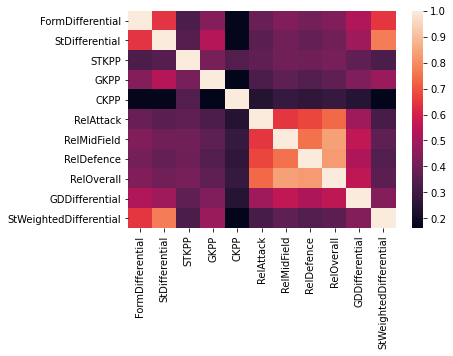

In [24]:
sns.heatmap(x_train_b.corr(method='kendall'))

In [25]:
cols1=['StDifferential','RelAttack','RelMidField','RelDefence']
x_train_b.drop(cols1, axis = 1 , inplace = True)
x_test_b.drop(cols1, axis = 1 , inplace = True)

D:\Softwares\Anaconda\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [26]:
cvscore=cross_val_score(GNB,x_train_b,y_train,cv=10)
crossvalscores.append(np.mean(cvscore))
print("Cross Validation Score for Class A features: "+ str(np.mean(crossvalscores)))

GNB.fit(x_train_b,y_train)
print("Validation Accuracy: "+ str(GNB.score(x_train_b,y_train)))
print("Testing Accuracy: "+ str(GNB.score(x_test_b,y_test)))

Cross Validation Score for Class A features: 0.5160980801605801
Validation Accuracy: 0.517231557960695
Testing Accuracy: 0.5609375


In [27]:
y_pred=GNB.predict(x_test_b)
labels=['H','A','D']

ConfusionMatrix= confusion_matrix(y_test,y_pred,labels)
print(ConfusionMatrix)

[[217  55  36]
 [ 43 114  17]
 [ 77  53  28]]


D:\Softwares\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=['H', 'A', 'D'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [28]:
print(classification_report(y_test,y_pred,labels))

              precision    recall  f1-score   support

           H       0.64      0.70      0.67       308
           A       0.51      0.66      0.58       174
           D       0.35      0.18      0.23       158

    accuracy                           0.56       640
   macro avg       0.50      0.51      0.49       640
weighted avg       0.53      0.56      0.54       640



In [29]:
prob_pred = GNB.predict_proba(x_test_b)

def RPS(p, e, r):
    m = dict(zip(np.unique(y_pred), [0, 1, 2]))
    n = len(p)
    rps = []
    for x in range(n):
        sum1=0

        for i in range(0, r):
            sum2=0
            obs = [0]*r
            obs[m[e[x]]] = 1

            for j in range(0, i):
                sum2 += p[x][j]-obs[j]

            sum1 += sum2**2
        rps.append(sum1/(r-1))

    #print(rps)

    #print('RPS:' + str(sum(rps)/n))
    print(np.mean(rps))
RPS(prob_pred, y_test, 3)

0.21056928402890923


In [30]:
Actual=[]
Home=Away=Draw=0
for i in y_test:
  if(i=='H'):
    Home+=1;
  elif(i=='A'):
    Away+=1;
  else:
    Draw+=1;
Actual.append(Home)
Actual.append(Away)
Actual.append(Draw)

In [31]:
Predicted=[]
PHome=PAway=PDraw=0
for i in y_pred:
  if(i=='H'):
    PHome+=1;
  elif(i=='A'):
    PAway+=1;
  else:
    PDraw+=1;
Predicted.append(PHome)
Predicted.append(PAway)
Predicted.append(PDraw)

#### Plots


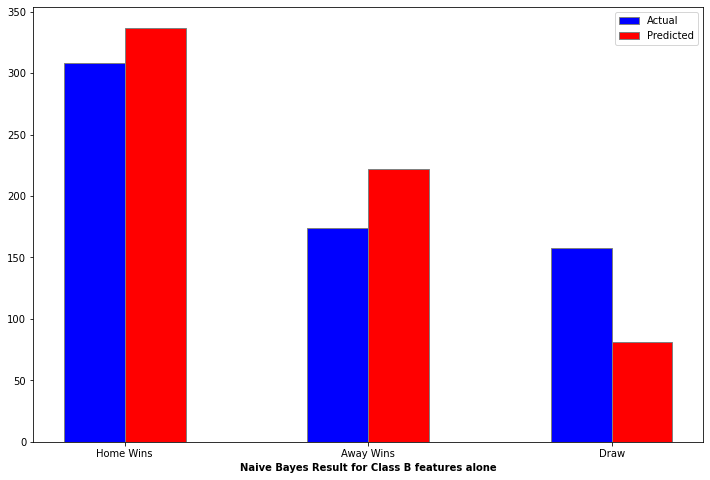

In [32]:
import numpy as np 
import matplotlib.pyplot as plt 
   
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 
      
# Set position of bar on X axis 
br1 = np.arange(3) 
br2 = [x + barWidth for x in br1] 
   
# Make the plot 
plt.bar(br1, Actual, color ='b', width = barWidth, 
        edgecolor ='grey', label ='Actual') 
plt.bar(br2, Predicted, color ='r', width = barWidth, 
        edgecolor ='grey', label ='Predicted') 
   
# Adding Xticks  
plt.xlabel('Naive Bayes Result for Class B features alone', fontweight ='bold') 
plt.ylabel('', fontweight ='bold') 
plt.xticks([r + barWidth/2 for r in range(len(Actual))], 
           ['Home Wins', 'Away Wins', 'Draw']) 
plt.legend(loc="upper right")   
plt.show()